#Problem STAtement


The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes
power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers 
approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, 
waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information 
on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Prediction :   Making two prediction  1) Fuel Type   2) capacity_mw 

In [54]:
#importing libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [55]:
# Importing dataset
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df

country country_long                                               name  \
0       IND        India                                   ACME Solar Tower   
1       IND        India                                ADITYA CEMENT WORKS   
2       IND        India                           AES Saurashtra Windfarms   
3       IND        India                                        AGARTALA GT   
4       IND        India                                       AKALTARA TPP   
5       IND        India                                       AKRIMOTA LIG   
6       IND        India                                             ALIYAR   
7       IND        India                                    ALLAIN DUHANGAN   
8       IND        India                                        ALMATTI DAM   
9       IND        India                                        AMAR KANTAK   
10      IND        India                                      AMARAVATI TPP   
11      IND        India                             ANANDPUR SAHIB ST-I&II   
12      IND        India                                        ANAPARA "C"   
13      IND        India                                             ANDHRA   
14      IND        India                                  ANOOPGARH ST I&II   
15      IND        India                                             ANPARA   
16      IND        India                                            ANTA GT   
17      IND        India                                            ANUPPUR   
18      IND        India                                         ANUPUR TPP   
19      IND        India                                  ARVINDNAGAR SUGAR   
20      IND        India                                    ASHOKNAGAR MILL   
21      IND        India                                       ATHANI SUGAR   
22      IND        India                                         AURAIYA GT   
23      IND        India                                AVANTHA BHANDAR TPP   
24      IND        India                               AWARPUR CEMENT PLANT   
25      IND        India                                           Abhijeet   
26      IND        India                          Amarsar Solar Power Plant   
27      IND        India                                  Anabura Wind Farm   
28      IND        India                Ananthapur - Meil Solar Power Plant   
29      IND        India                              Andrha Lake Wind Farm   
30      IND        India                               Anikkadavu Wind Farm   
31      IND        India                             Arasinagundi Wind Farm   
32      IND        India                 Askandra - DREPL Solar Power Plant   
33      IND        India  Askandra - Electromech Maritech Solar Power Plant   
34      IND        India              Askandra - Finehope Solar Power Plant   
35      IND        India                 Askandra - Khaya Solar Power Plant   
36      IND        India                Askandra - Newton Solar Power Plant   
37      IND        India               Askandra - Saidham Solar Power Plant   
38      IND        India                Askandra - Vasavi Solar Power Plant   
39      IND        India                                      B. BRIDGE D.G   
40      IND        India                                           BADARPUR   
41      IND        India                                       BAGALKOT ICP   
42      IND        India                                       BAGLIHAR HEP   
43      IND        India                                    BAGLIHAR HEP-II   
44      IND        India                                         BAIRA SIUL   
45      IND        India                                          BAKRESWAR   
46      IND        India                                          BALCO TPP   
47      IND        India                                           BALIMELA   
48      IND        India                               BALLARPUR BILT POWER   
49      IND        India                              

In [4]:
df.shape

(908, 25)

In [ ]:
#Their are 908 rows and 25 columns in dataset

In [5]:
#for displaying max. rows
pd.set_option('display.max_rows', None)

In [6]:
# checking Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [7]:
#checking datatype
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [ ]:
#Two types of data type present in dataset. 1. float, 2. object

#In this dataset initial two columns named country, county_long doesnt have more significance as showing same country name
India and values are same for all the rows. As whole datset is related to India only. I am droping these two columns.

2.Also column name URl having links, which doesnt relate my model building hence, droping it.


In [8]:
#dropping columns
del df['country']
del df['country_long']
del df['url']

In [9]:
df.isnull().sum()

name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

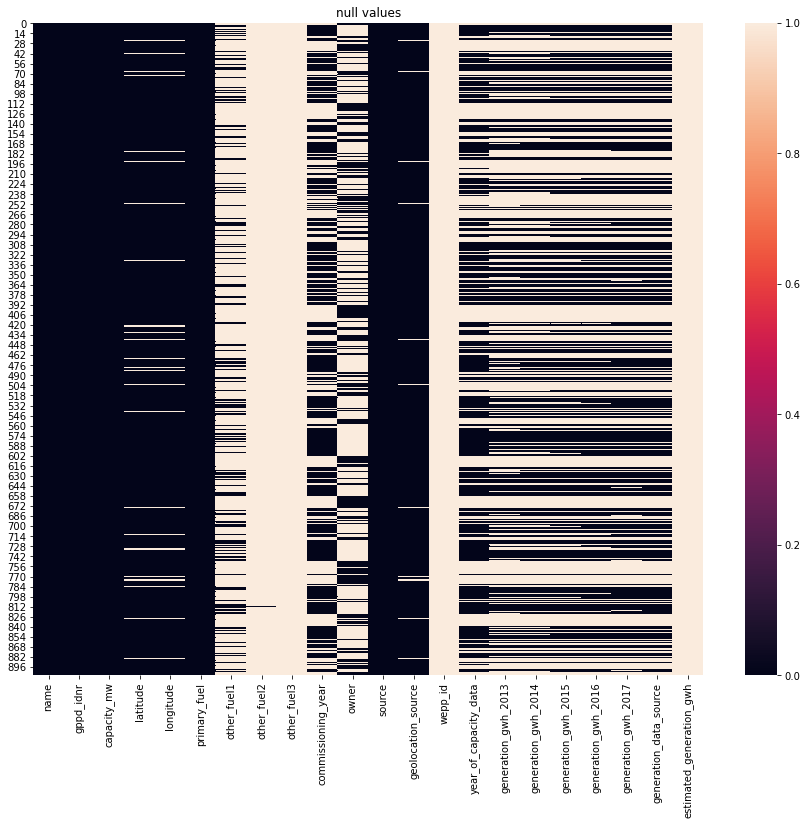

In [10]:
#Heatmap for checking null values
plt.figure(figsize = [15,12])
sns.heatmap(df.isnull())
plt.title("null values")
plt.show()

In [ ]:
# So many null values where present in dataset,from above observations-in columns other_fuel2,other_fuel3,wepp_id,estimated_generation_gwh having all 908 rows null. i am decided to remove them for building better model.

In [11]:
#Dropping columns having all null values
del df['estimated_generation_gwh']
del df['other_fuel2']
del df['other_fuel3']
del df['wepp_id']

In [25]:
#filling null values using mode
df['other_fuel1'] = df['other_fuel1'].fillna(df['other_fuel1'].mode()[0])
df['owner'] = df['owner'].fillna(df['owner'].mode()[0])
df['geolocation_source'] = df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])
df['generation_data_source'] = df['generation_data_source'].fillna(df['generation_data_source'].mode()[0])

In [29]:
#filling null values using mean values
df["latitude"]=df["latitude"].replace(np.NaN,df["latitude"].mean())
df["longitude"]=df["longitude"].replace(np.NaN,df["longitude"].mean())
df["commissioning_year"]=df["commissioning_year"].replace(np.NaN,df["commissioning_year"].mean())
df["year_of_capacity_data"]=df["year_of_capacity_data"].replace(np.NaN,df["year_of_capacity_data"].mean())
df["generation_gwh_2013"]=df["generation_gwh_2013"].replace(np.NaN,df["generation_gwh_2013"].mean())
df["generation_gwh_2014"]=df["generation_gwh_2014"].replace(np.NaN,df["generation_gwh_2014"].mean())
df["generation_gwh_2015"]=df["generation_gwh_2015"].replace(np.NaN,df["generation_gwh_2015"].mean())
df["generation_gwh_2016"]=df["generation_gwh_2016"].replace(np.NaN,df["generation_gwh_2016"].mean())
df["generation_gwh_2017"]=df["generation_gwh_2017"].replace(np.NaN,df["generation_gwh_2017"].mean())

In [30]:
df.isnull().sum()

name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
commissioning_year        0
owner                     0
source                    0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_data_source    0
dtype: int64

In [31]:
#Converting object type data into integers
encode = LabelEncoder() 
for i in df.columns:
    if df[i].dtype=="object":
        df[i]=encode.fit_transform(df[i])

In [32]:
df

name  gppd_idnr  capacity_mw   latitude  longitude  primary_fuel  \
0       0        658        2.500  28.183900  73.240700             6   
1       1        520       98.000  24.766300  74.609000             1   
2       2        854       39.200  21.903800  69.373200             7   
3       3          0      135.000  23.871200  91.360200             2   
4       4          1     1800.000  21.960300  82.409100             1   
5       5          2      250.000  23.768900  68.644700             1   
6       6          3       60.000  10.454700  77.007800             3   
7       7          4      192.000  32.225800  77.207000             3   
8       8          5      290.000  16.330000  75.886300             3   
9       9          6      210.000  23.164200  81.637300             1   
10     10          7     1350.000  21.078200  77.900900             1   
11     11          8      134.000  31.271700  76.493800             3   
12     12          9     1200.000  24.200700  82.800000             1   
13     13         10       16.950  31.241200  77.876900             3   
14     14         11        9.000  21.196189  77.447848             3   
15     15         12     2630.000  24.201000  82.789100             1   
16     16         13      419.330  25.179700  76.318800             2   
17     17        635      600.000  23.066600  81.784100             1   
18     18         14     1200.000  23.065500  81.786500             1   
19     19        577       10.000  18.084500  76.185100             0   
20     20        578       17.000  19.586700  74.706100             0   
21     21        543       24.000  16.770800  74.919100             0   
22     22         15      652.000  26.628200  79.528600             2   
23     23         16      600.000  21.743800  83.274100             1   
24     24        579       46.000  19.788100  79.151800             1   
25     25        657       50.000  21.196189  77.447848             6   
26     26        705        1.000  28.361500  74.240200             6   
27     27        670       16.500  14.575100  76.392600             7   
28     28        706       50.000  14.945500  77.687000             6   
29     29        884      113.600  18.858000  73.639600             7   
30     30        832       19.800  10.724500  77.189300             7   
31     31        669       13.200  14.479100  76.348200             7   
32     32        707        5.000  27.347300  71.691700             6   
33     33        708        5.000  27.360000  71.691800             6   
34     34        709        5.000  27.363200  71.691800             6   
35     35        710        5.000  27.366100  71.691600             6   
36     36        711        5.000  27.353700  71.691700             6   
37     37        712        5.000  27.350400  71.691800             6   
38     38        713        5.000  27.356600  71.691700             6   
39     39         17      200.000  13.097700  80.269500             5   
40     40         18      705.000  28.506000  77.306600             1   
41     41        544       28.000  16.280400  75.225000             0   
42     42         19      450.000  33.181500  75.315500             3   
43     43         20      450.000  21.196189  77.447848             3   
44     44         21      180.000  32.806300  76.141800             3   
45     45         22     1050.000  23.828500  87.451300             1   
46     46         24      600.000  21.196189  77.447848             1   
47     47         23      510.000  18.139600  82.122100             3   
48     48        580       67.500  19.860100  79.342100             1   
49     49        521       10.000  24.692900  74.689000             1   
50     50         25      300.000  22.342100  82.430500             1   
51     51         26      455.000  22.995600  88.404200             1   
52     52         27       12.000  32.168600  76.469500             3   
53     53         28      315.000  24.191700  81.287500        

In [ ]:
#checking columns name
df.columns

In [33]:
#multivariate analysis
corr_mat=df.corr()
corr_mat

name  gppd_idnr  capacity_mw  latitude  longitude  \
name                    1.000000   0.336792     0.059870 -0.133707   0.018649   
gppd_idnr               0.336792   1.000000    -0.334308 -0.105932  -0.380290   
capacity_mw             0.059870  -0.334308     1.000000  0.049790   0.197124   
latitude               -0.133707  -0.105932     0.049790  1.000000   0.031501   
longitude               0.018649  -0.380290     0.197124  0.031501   1.000000   
primary_fuel            0.038752   0.607373    -0.377783 -0.013453  -0.348710   
other_fuel1            -0.037293   0.367919    -0.598462 -0.038138  -0.278016   
commissioning_year     -0.041884   0.041601     0.265827  0.095050   0.086054   
owner                   0.116715  -0.602108     0.303672  0.007033   0.277888   
source                 -0.013801   0.416575    -0.241701  0.055943  -0.239008   
geolocation_source      0.045242  -0.410407     0.183286 -0.177949   0.244116   
year_of_capacity_data        NaN        NaN          NaN       NaN        NaN   
generation_gwh_2013     0.082699   0.044187     0.667842  0.036639   0.014021   
generation_gwh_2014     0.084915   0.045391     0.705434  0.044085   0.011669   
generation_gwh_2015     0.075140   0.039965     0.722081  0.036127   0.019176   
generation_gwh_2016     0.067800   0.027947     0.752829  0.030932   0.039758   
generation_gwh_2017     0.075262   0.024079     0.767040  0.030655   0.040407   
generation_data_source -0.004177   0.735795    -0.494694 -0.086420  -0.408675   

                        primary_fuel  other_fuel1  commissioning_year  \
name                        0.038752    -0.037293           -0.041884   
gppd_idnr                   0.607373     0.367919            0.041601   
capacity_mw                -0.377783    -0.598462            0.265827   
latitude                   -0.013453    -0.038138            0.095050   
longitude                  -0.348710    -0.278016            0.086054   
primary_fuel                1.000000     0.477575           -0.123060   
other_fuel1                 0.477575     1.000000           -0.312623   
commissioning_year         -0.123060    -0.312623            1.000000   
owner                      -0.260174    -0.325590           -0.021670   
source                      0.053609     0.254622            0.021832   
geolocation_source         -0.419911    -0.182706            0.000606   
year_of_capacity_data            NaN          NaN                 NaN   
generation_gwh_2013        -0.120512    -0.321929            0.110848   
generation_gwh_2014        -0.125000    -0.336848            0.134305   
generation_gwh_2015        -0.125138    -0.332677            0.149304   
generation_gwh_2016        -0.131358    -0.350003            0.172698   
generation_gwh_2017        -0.132174    -0.361901            0.173400   
generation_data_source      0.481758     0.524955           -0.096740   

                               owner        source  geolocation_source  \
name                    1.167146e-01 -1.380057e-02        4.524166e-02   
gppd_idnr              -6.021076e-01  4.165747e-01       -4.104067e-01   
capacity_mw             3.036718e-01 -2.417009e-01        1.832864e-01   
latitude                7.033301e-03  5.594280e-02       -1.779492e-01   
longitude               2.778876e-01 -2.390075e-01        2.441165e-01   
primary_fuel           -2.601736e-01  5.360860e-02       -4.199115e-01   
other_fuel1            -3.255902e-01  2.546220e-01       -1.827059e-01   
commissioning_year     -2.166954e-02  2.183213e-02        6.061649e-04   
owner                   1.000000e+00 -2.438403e-01        3.983410e-01   
source                 -2.438403e-01  1.000000e+00       -4.920752e-01   
geolocation_source      3.983410e-01 -4.920752e-01        1.000000e+00   
year_of_capacity_data            NaN           NaN                 NaN   
generation_gwh_2013     1.506199e-16  3.108486e-17       -1.005405e-16   
generation_gwh_2014    -1.018477e-16  3.524754e-17       -1.8615

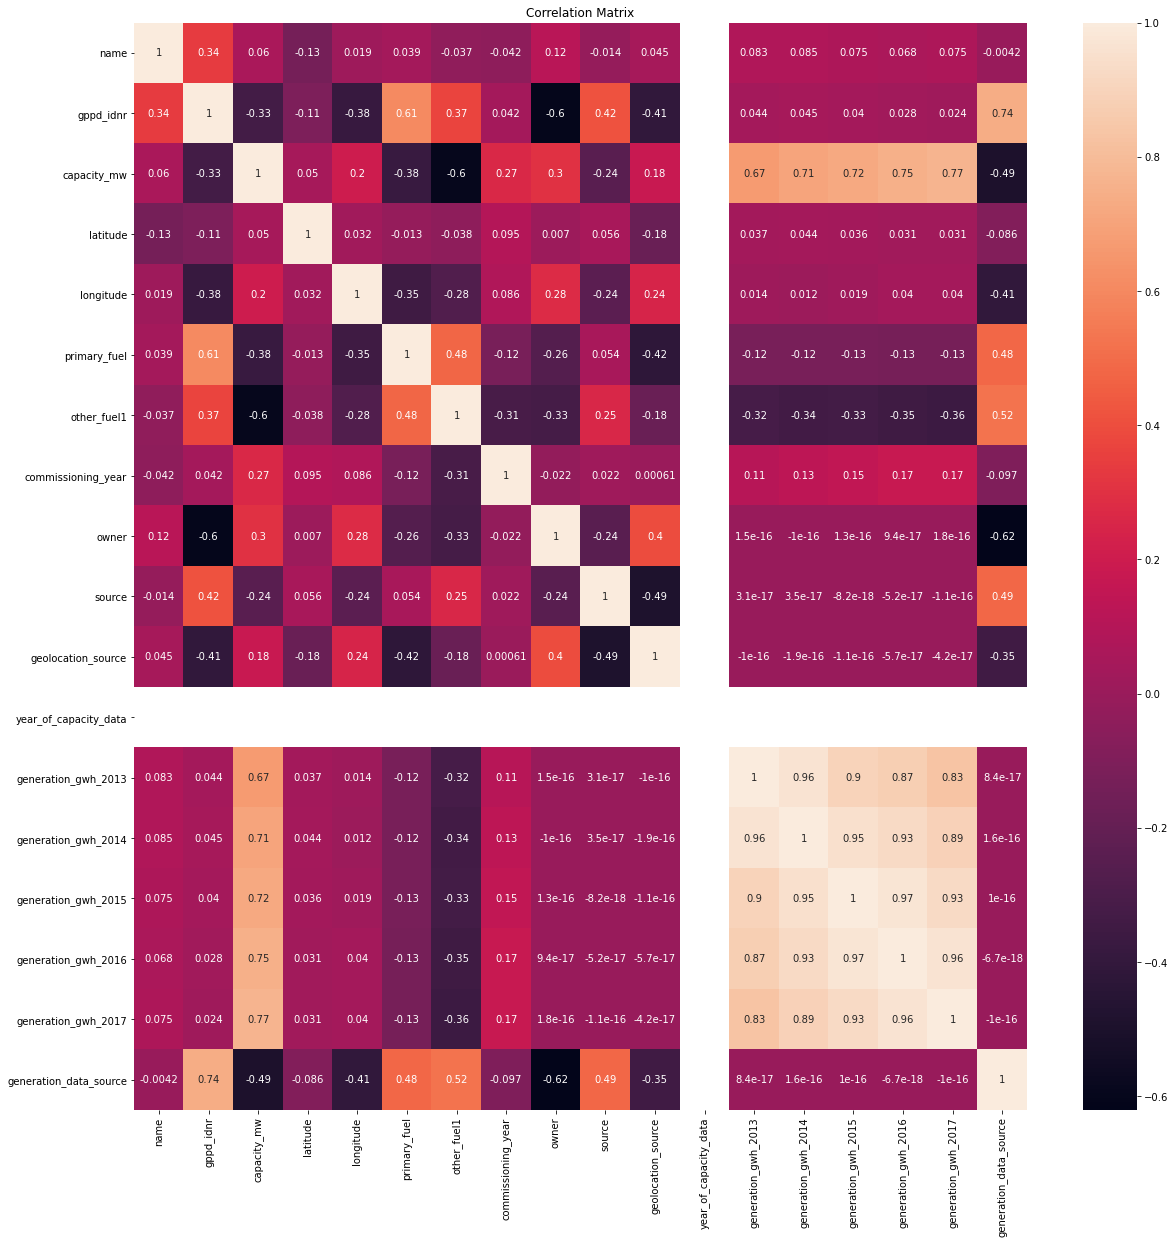

In [34]:
# heatmap for analysing correlation
plt.figure(figsize=[20,20])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [35]:
#for better understanding correalation with target col.(primary_fuel/Fuel_type)
corr_mat=df.corr()
corr_mat["primary_fuel"].sort_values(ascending=False)

primary_fuel              1.000000
gppd_idnr                 0.607373
generation_data_source    0.481758
other_fuel1               0.477575
source                    0.053609
name                      0.038752
latitude                 -0.013453
generation_gwh_2013      -0.120512
commissioning_year       -0.123060
generation_gwh_2014      -0.125000
generation_gwh_2015      -0.125138
generation_gwh_2016      -0.131358
generation_gwh_2017      -0.132174
owner                    -0.260174
longitude                -0.348710
capacity_mw              -0.377783
geolocation_source       -0.419911
year_of_capacity_data          NaN
Name: primary_fuel, dtype: float64

In [36]:
#for better understanding correalation with target col.(capacity_mw)
corr_mat=df.corr()
corr_mat["capacity_mw"].sort_values(ascending=False)

capacity_mw               1.000000
generation_gwh_2017       0.767040
generation_gwh_2016       0.752829
generation_gwh_2015       0.722081
generation_gwh_2014       0.705434
generation_gwh_2013       0.667842
owner                     0.303672
commissioning_year        0.265827
longitude                 0.197124
geolocation_source        0.183286
name                      0.059870
latitude                  0.049790
source                   -0.241701
gppd_idnr                -0.334308
primary_fuel             -0.377783
generation_data_source   -0.494694
other_fuel1              -0.598462
year_of_capacity_data          NaN
Name: capacity_mw, dtype: float64

In [ ]:
#In this dataset we are using the two target columns-named 1. FUEL-TYPE, 2. CAPACITY_MW
# Above corerelation matrix with two different target columns shown as follows:
# 1. With Fuel-Type  :  5 columns shown +ve correlation with Target column, whereas highest correaltion is 0.607373(gppd_idnr).
# remaining cols. shown -ve correaltion.
# 2. With CAPACITY_MW : 11 cols. showmn +ve correlation, whereas highest corr. is with generation_gwh_2017 (0.767040) and generation_gwh_2016

In [ ]:
# Col.named-year_of_capacity_data showing no correlation with both the target columns, hence dropping it

In [46]:
# dropping col
del df['year_of_capacity_data']

<function matplotlib.pyplot.show(close=None, block=None)>

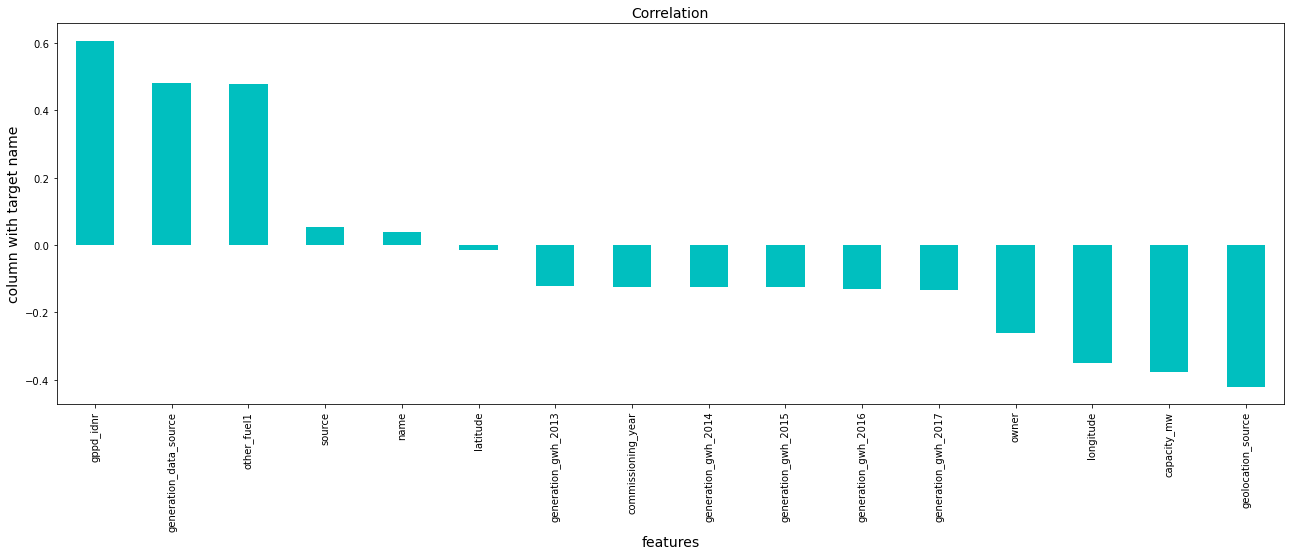

In [47]:
#plotting graph showing +ve and -ve correlation of coloumn(with target col.-primary_fuel)
plt.figure(figsize=(22,7))
df.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='c')
plt.xlabel('features', fontsize=14)
plt.ylabel('column with target name', fontsize=14)
plt.title('Correlation', fontsize=14)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

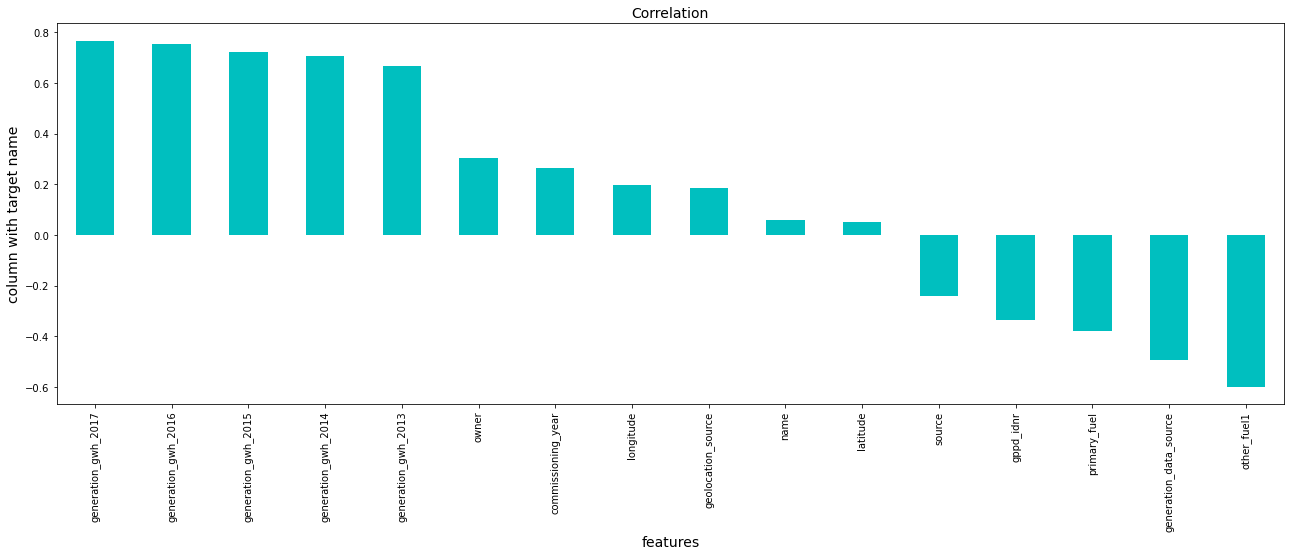

In [48]:
#plotting graph showing +ve and -ve correlation of coloumn(with target col.-capacity_mw)
plt.figure(figsize=(22,7))
df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('features', fontsize=14)
plt.ylabel('column with target name', fontsize=14)
plt.title('Correlation', fontsize=14)
plt.show

In [49]:
df.describe()

name  gppd_idnr  capacity_mw    latitude   longitude  \
count  908.00000  908.00000   908.000000  908.000000  908.000000   
mean   453.50000  453.50000   321.046378   21.196189   77.447848   
std    262.26132  262.26132   580.221767    6.088110    4.781201   
min      0.00000    0.00000     0.000000    8.168900   68.644700   
25%    226.75000  226.75000    16.837500   17.057825   74.390250   
50%    453.50000  453.50000    60.000000   21.278850   76.978950   
75%    680.25000  680.25000   388.125000   25.183775   79.211600   
max    907.00000  907.00000  4760.000000   34.649000   95.408000   

       primary_fuel  other_fuel1  commissioning_year       owner      source  \
count    908.000000   908.000000          908.000000  908.000000  908.000000   
mean       3.205947     2.776432         1996.876894  227.534141   43.823789   
std        2.281339     0.429886           12.994825   83.895877   44.624092   
min        0.000000     0.000000         1927.000000    0.000000    0.000000   
25%        1.000000     3.000000         1996.876894  188.750000   22.000000   
50%        3.000000     3.000000         1996.876894  280.000000   22.000000   
75%        6.000000     3.000000         2003.000000  280.000000   29.250000   
max        7.000000     3.000000         2018.000000  280.000000  190.000000   

       geolocation_source  generation_gwh_2013  generation_gwh_2014  \
count          908.000000           908.000000           908.000000   
mean             1.754405          2304.059202          2420.393316   
std              0.699844          2465.930970          2665.360236   
min              0.000000             0.000000             0.000000   
25%              2.000000          1332.538825          1175.264825   
50%              2.000000          2304.059202          2420.393316   
75%              2.000000          2304.059202          2420.393316   
max              3.000000         27586.200000         28127.000000   

       generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
count           908.000000           908.000000           908.000000   
mean           2414.072373          2453.936292          2531.754458   
std            2860.146282          2878.730064          2923.041411   
min               0.000000             0.000000             0.000000   
25%             874.205000           826.629750           852.438887   
50%            2414.072373          2453.936292          2531.754458   
75%            2414.072373          2453.936292          2531.754458   
max           30539.000000         30015.000000         35116.000000   

       generation_data_source  
count              908.000000  
mean                 0.504405  
std                  0.500256  
min                  0.000000  
25%                  0.000000  
50%                  1.000000  
75%                  1.000000  
max                  1.000000

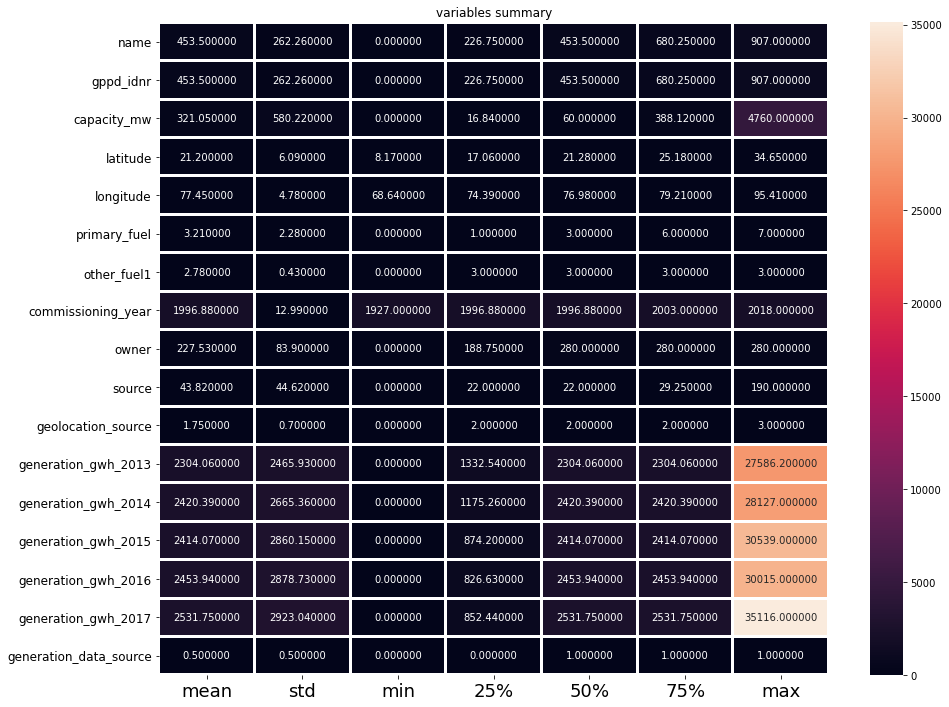

In [50]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2), linewidth=2, annot=True, fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("variables summary")
plt.show()

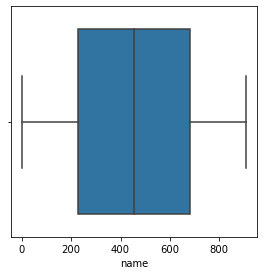

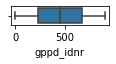

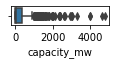

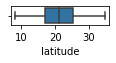

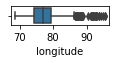

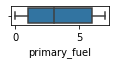

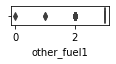

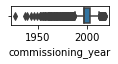

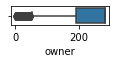

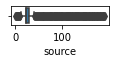

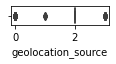

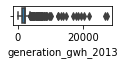

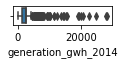

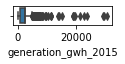

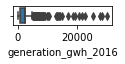

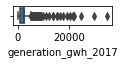

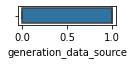

In [51]:
#checking outliers
plt.figure(figsize=(15,50))
graph=1
for column in df:
    if graph<=30:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(df[column], orient='v')
        plt.xlabel(column, fontsize=10)
    graph+=1
    plt.show()

In [ ]:
#outliers is present in many columns, need to remove outliers

In [52]:
#removing outliers using z-score method
from scipy.stats import zscore
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]

In [53]:
print("shape before and after")
print("shape before".ljust(20),":",df.shape)
print("shape after".ljust(20),":",df_new.shape)
print("Percentage Loss".ljust(20),":",(df.shape[0]-df_new.shape[0])/df.shape[0])

shape before and after
shape before         : (908, 17)
shape after          : (832, 17)
Percentage Loss      : 0.08370044052863436


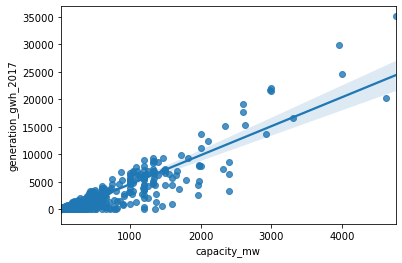

In [60]:
#plot for understanding relation between target col-capacity_mw and other cols.
ax=sns.regplot(x='capacity_mw', y='generation_gwh_2017',data=df)

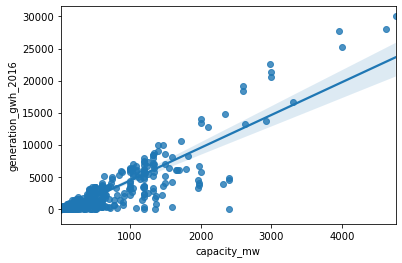

In [58]:
#plot for understanding relation between target col-capacity_mw and other cols.
ax=sns.regplot(x='capacity_mw', y='generation_gwh_2016',data=df)

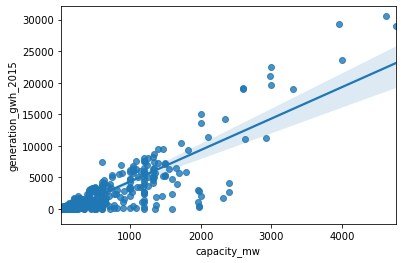

In [59]:
#plot for understanding relation between target col-capacity_mw and other cols.
ax=sns.regplot(x='capacity_mw', y='generation_gwh_2015',data=df)

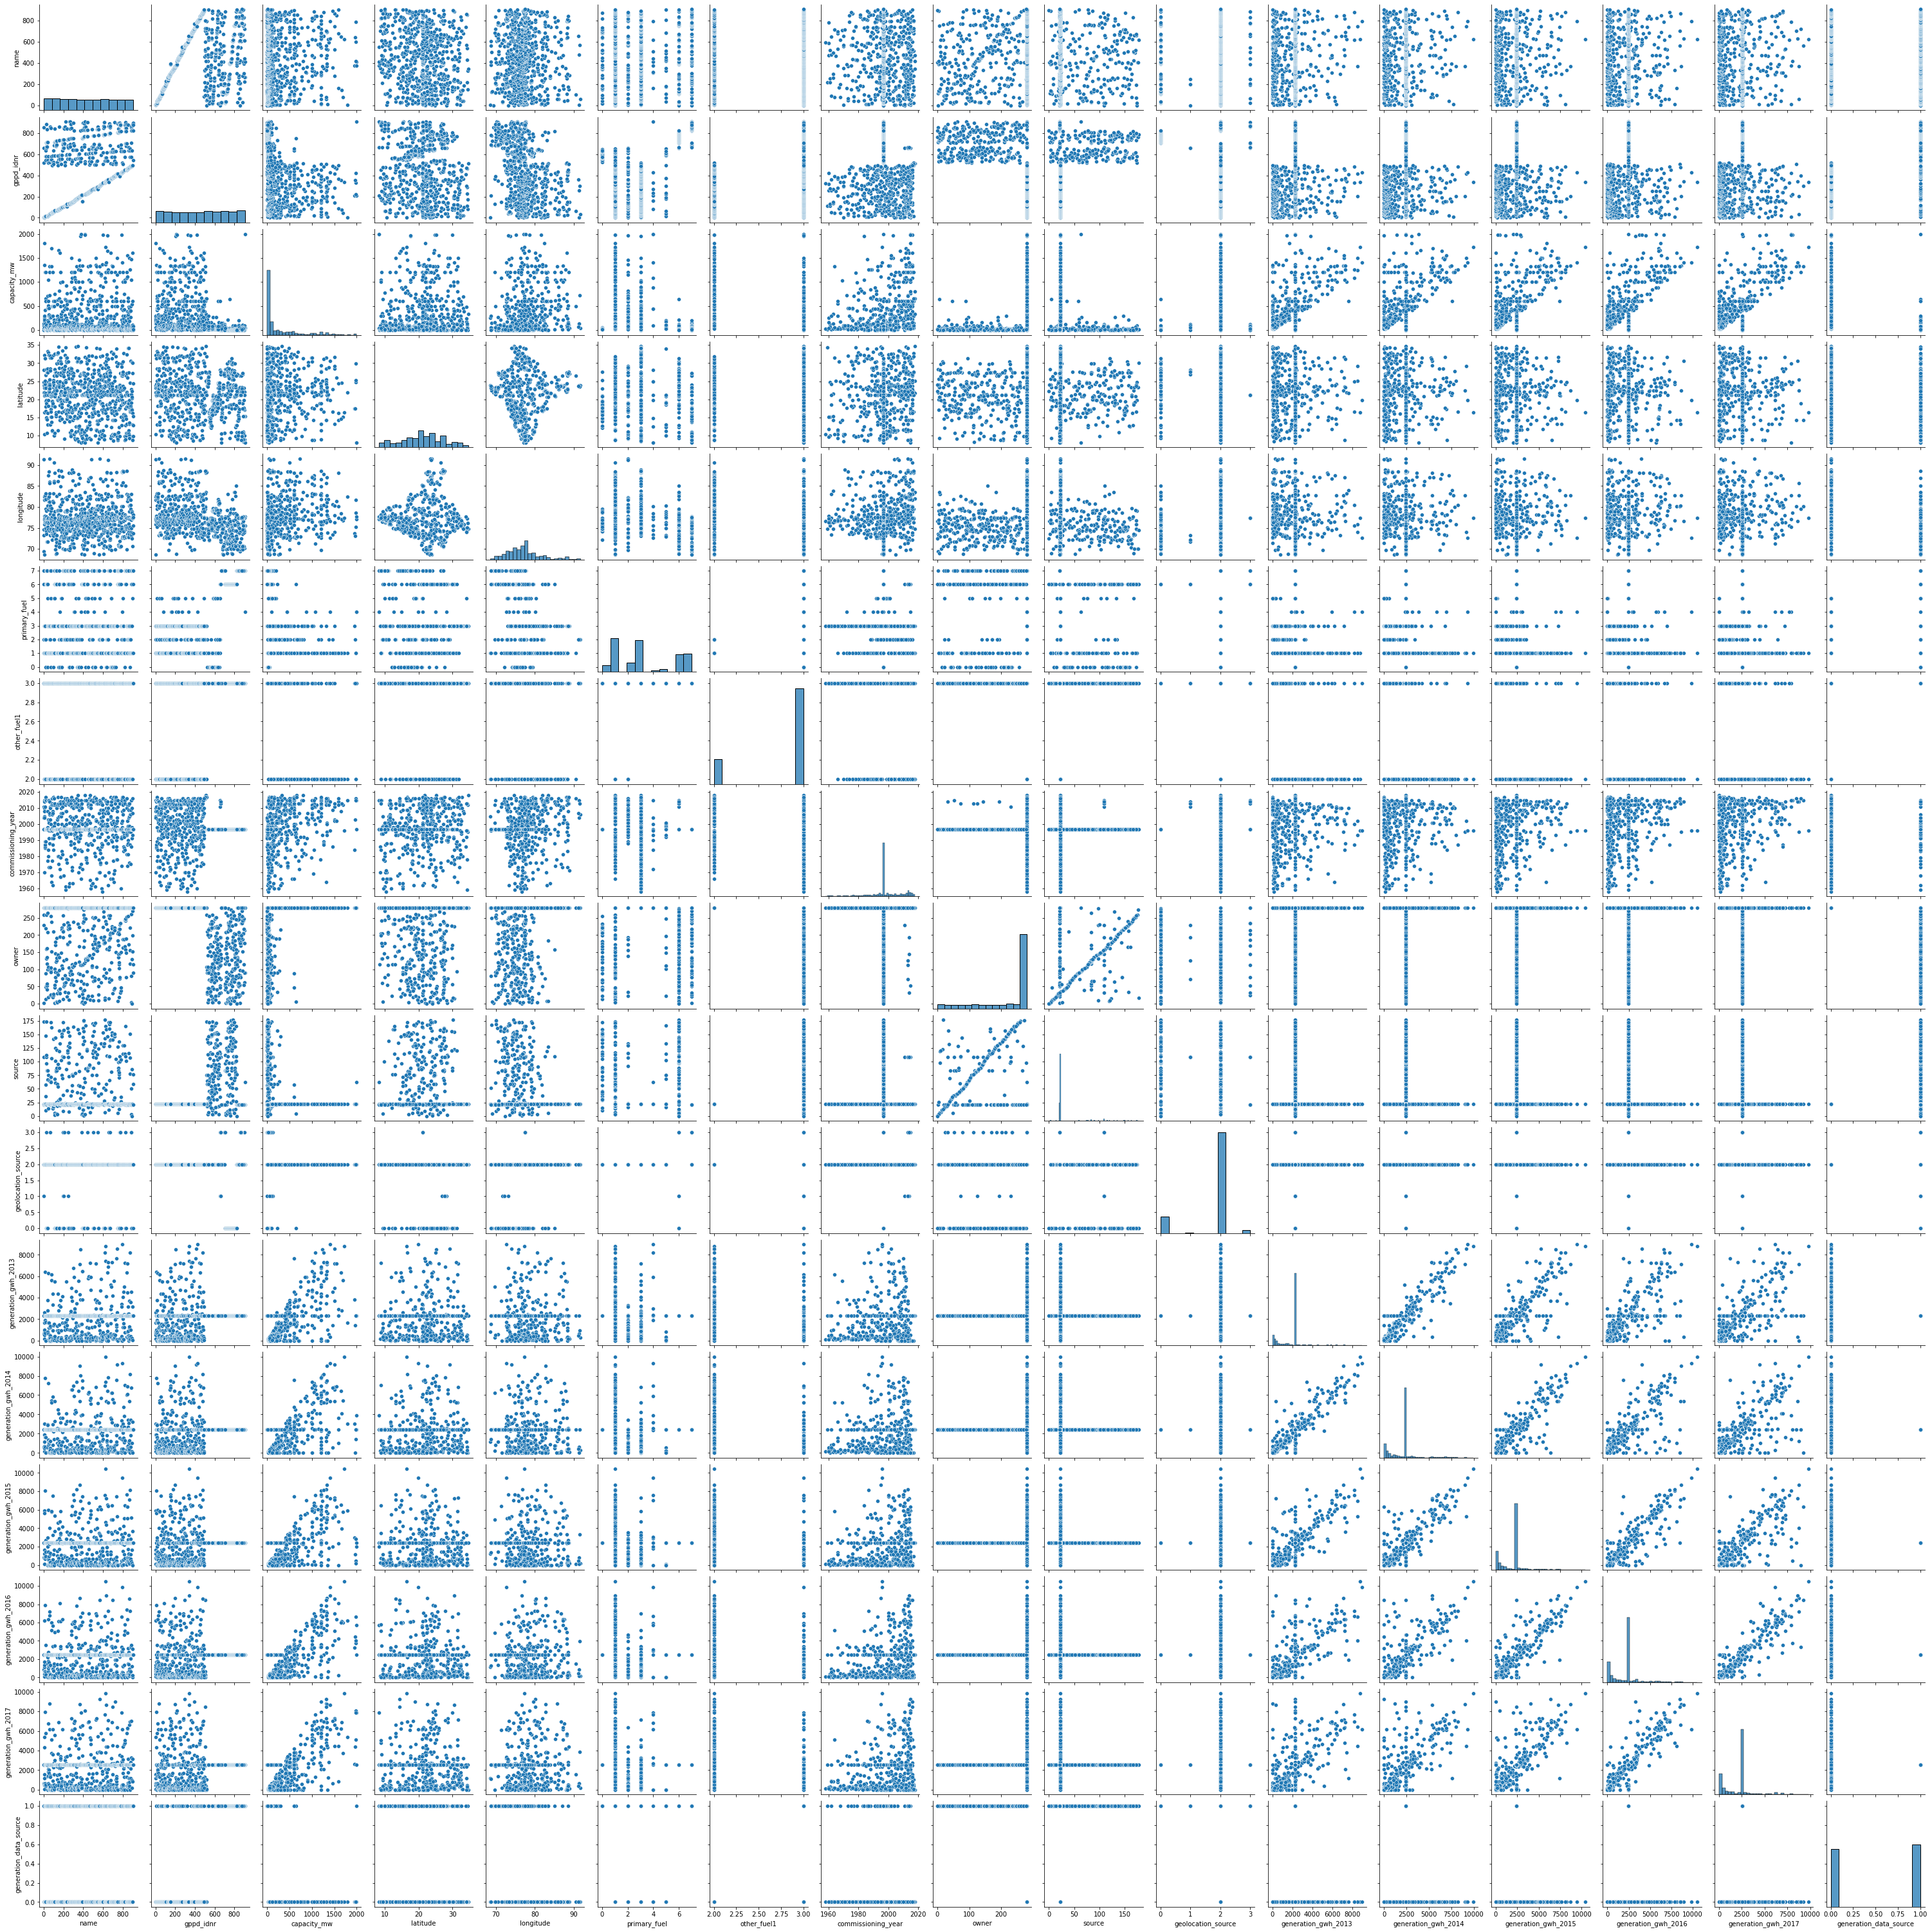

In [62]:
##plot for understanding relation between cols.
sns.pairplot(df_new)
plt.show()

In [ ]:
#Building Regression model using Target Column-Capacity MW for prediction

In [63]:
#splitting data
x=df_new.drop("capacity_mw", axis=1)
y=df_new["capacity_mw"]

In [65]:
#Checking skewness
x.skew()

name                      0.025209
gppd_idnr                -0.054245
latitude                 -0.113779
longitude                 0.853291
primary_fuel              0.415028
other_fuel1              -1.441965
commissioning_year       -0.852148
owner                    -1.248127
source                    1.780743
geolocation_source       -1.852532
generation_gwh_2013       1.546690
generation_gwh_2014       1.454599
generation_gwh_2015       1.338087
generation_gwh_2016       1.360805
generation_gwh_2017       1.253852
generation_data_source   -0.072293
dtype: float64

In [68]:
#treating skewness
from sklearn.preprocessing import power_transform
import pandas as pd
x = power_transform(x)
x = pd.DataFrame(x)

In [70]:
#splitling into tRain and test
from sklearn.model_selection import train_test_split

In [ ]:
#scaling data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [74]:
#creating train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25)

In [76]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import  r2_score

In [78]:
#knn 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model_RFR = RandomForestRegressor(max_depth=10)

model_RFR.fit(x_train, y_train)

predict_train = model_RFR.predict(x_train)
predict_test = model_RFR.predict(x_train)

print('RMSE on train data: ', mean_squared_error(y_train, predict_train)**(0.5))
print('RMSE on test data: ', mean_squared_error(y_train, predict_test)**(0.5))

RMSE on train data:  78.59322044204242
RMSE on test data:  78.59322044204242


In [158]:
#DTR Model
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
mse = mean_squared_error(y_pred,y_test)
r2score = r2_score(y_pred,y_test)
print(r2score)
print(mse)

0.9146111235313114
0.44


In [82]:
#model-RFR
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_test)
mse = mean_squared_error(y_pred,y_test)
r2score = r2_score(y_pred,y_test)
print(r2score)
print(mse)

0.832569321814789
30694.885825630896


In [86]:
#XGB
from sklearn.ensemble import GradientBoostingRegressor
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
y_pred = GBR.predict(x_test)
mse = mean_squared_error(y_pred,y_test)
r2score = r2_score(y_pred,y_test)
print(r2score)
print(mse)

0.8160221920411469
34969.22263185684


In [89]:
#LinearRegression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
mse = mean_squared_error(y_pred,y_test)
r2score = r2_score(y_pred,y_test)
print(r2score)
print(mse)

0.7787561341531164
37771.886955220725


In [88]:
#KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
mse = mean_squared_error(y_pred,y_test)
r2score = r2_score(y_pred,y_test)
print(r2score)
print(mse)

0.778283743269909
35373.75039771846


In [139]:
from sklearn.ensemble import VotingRegressor

r1 = GradientBoostingRegressor(random_state=1)
r2 = RandomForestRegressor(random_state=1)
r3 = LinearRegression()
ereg = VotingRegressor(estimators=[('GBR', r1), ('rfr', r2), ('lr', r3)])
ereg = ereg.fit(x, y)
print(ereg.fit(x, y).predict(x))

[5.90056496 1.54528358 6.47720392 1.96516175 0.58113115 0.95059594
 2.76941363 2.68902629 2.59643619 0.78121181 0.65163434 2.76944993
 0.74679508 2.84173694 2.81576627 2.26772431 1.76188017 0.81443231
 1.27575455 1.39615438 0.8009442  2.16975013 0.68631714 1.521653
 4.05626426 6.12409852 7.12967696 6.03411267 7.75172287 6.87129008
 7.12466417 5.88310984 5.93356481 5.96184251 6.21182254 6.41666792
 6.63108196 6.88532572 3.58379267 0.86364524 1.2236234  2.70715682
 2.64009171 2.80207798 0.73485463 0.81677299 2.610414   1.75744847
 1.50227213 0.81994265 0.82023832 2.86646836 2.62682928 2.63145903
 2.69758158 2.71787474 1.58325878 0.92276619 2.02806288 0.65342239
 2.70859682 0.96908529 0.85160944 0.95145529 1.4146391  2.73028125
 2.86805809 6.02934178 6.44671789 1.70710102 0.99334135 3.77791593
 1.49187939 1.38952014 0.58677174 2.93118033 1.53235603 2.78053674
 1.34410824 2.85345878 2.94214002 2.91618788 1.83205482 2.74292222
 2.74813283 2.7379413  1.77042977 0.84046503 2.87360053 2.872075

In [149]:
#Best model Hypertunning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [150]:
#RandomForestRegressor
parameters = {'n_estimators' :[100, 200, 700],
            'max_features': ['auto', 'sqrt','log2'],
            'max_depth': [4,5,6,7,8],
            'criterion': ['mse', 'mae']}

In [152]:
GCV = GridSearchCV(RandomForestRegressor(),parameters,cv=3)

In [153]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 700]})

In [154]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 100}

In [155]:
mod=RandomForestRegressor(criterion='mse', max_depth=8, max_features='auto', n_estimators= 100)

mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(r2_score(y_test,pred)*100)

95.56184992388685


In [157]:
#saving model
import joblib
joblib.dump(mod,"Globalpower Capacity_mw prediction.pkl")

['Globalpower Capacity_mw prediction.pkl']

# Building Classifiaction model-Using Primary_fuel as a target column using same dataset

In [101]:
#splitting data
x=df_new.drop("primary_fuel", axis=1)
y=df_new["primary_fuel"]

In [106]:
#target col. analysis
df_new["primary_fuel"].value_counts()

1    232
3    219
7    123
6    121
2     64
0     45
5     19
4      9
Name: primary_fuel, dtype: int64

In [ ]:
#Target col. is multiclass data

<function matplotlib.pyplot.show(close=None, block=None)>

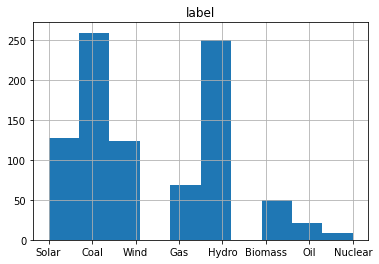

In [107]:
#multivariate analysis
df["primary_fuel"].hist(grid=True)
plt.title('label')
plt.show

In [108]:
#Handling Imbalance by oversampling
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_over, y_over = SM.fit_resample(x,y)

In [109]:
#again checking target col.
y_over.value_counts()

0    232
1    232
2    232
3    232
4    232
5    232
6    232
7    232
Name: primary_fuel, dtype: int64

In [110]:
#scaling data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [111]:
#finding best random State
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
maxAcc=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    predf = LR.predict(x_test)
    acc= accuracy_score(y_test, predf)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Best accuracy is", maxAcc, "on Random_state", maxRS)

Best accuracy is 0.9038461538461539 on Random_state 155


In [113]:
#creating train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=155)

In [114]:
#model building-Logistic Regression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

LR = LogisticRegression()
LR.fit(x_train, y_train)
prelr = LR.predict(x_test)
print(accuracy_score(y_test,prelr))
print(confusion_matrix(y_test,prelr))
print(classification_report(y_test,prelr))

0.884
[[10  3  0  0  0  0  0  0]
 [ 3 74  0  0  0  0  0  0]
 [ 3  1  5  7  0  0  0  0]
 [ 0  0  2 64  0  0  0  0]
 [ 0  0  1  3  0  0  0  0]
 [ 0  1  0  4  0  0  0  0]
 [ 0  1  0  0  0  0 40  0]
 [ 0  0  0  0  0  0  0 28]]
              precision    recall  f1-score   support

           0       0.62      0.77      0.69        13
           1       0.93      0.96      0.94        77
           2       0.62      0.31      0.42        16
           3       0.82      0.97      0.89        66
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         5
           6       1.00      0.98      0.99        41
           7       1.00      1.00      1.00        28

    accuracy                           0.88       250
   macro avg       0.62      0.62      0.62       250
weighted avg       0.85      0.88      0.86       250



In [115]:
#DecisionTree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.828
[[ 9  3  1  0  0  0  0  0]
 [ 7 61  7  0  0  2  0  0]
 [ 0  1  7  5  1  2  0  0]
 [ 0  0  7 59  0  0  0  0]
 [ 0  0  0  4  0  0  0  0]
 [ 0  0  1  0  2  2  0  0]
 [ 0  0  0  0  0  0 41  0]
 [ 0  0  0  0  0  0  0 28]]
              precision    recall  f1-score   support

           0       0.56      0.69      0.62        13
           1       0.94      0.79      0.86        77
           2       0.30      0.44      0.36        16
           3       0.87      0.89      0.88        66
           4       0.00      0.00      0.00         4
           5       0.33      0.40      0.36         5
           6       1.00      1.00      1.00        41
           7       1.00      1.00      1.00        28

    accuracy                           0.83       250
   macro avg       0.63      0.65      0.64       250
weighted avg       0.85      0.83      0.84       250



In [116]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf= rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.908
[[12  1  0  0  0  0  0  0]
 [ 5 72  0  0  0  0  0  0]
 [ 0  1  7  6  0  2  0  0]
 [ 0  0  0 66  0  0  0  0]
 [ 0  0  0  4  0  0  0  0]
 [ 0  0  2  2  0  1  0  0]
 [ 0  0  0  0  0  0 41  0]
 [ 0  0  0  0  0  0  0 28]]
              precision    recall  f1-score   support

           0       0.71      0.92      0.80        13
           1       0.97      0.94      0.95        77
           2       0.78      0.44      0.56        16
           3       0.85      1.00      0.92        66
           4       0.00      0.00      0.00         4
           5       0.33      0.20      0.25         5
           6       1.00      1.00      1.00        41
           7       1.00      1.00      1.00        28

    accuracy                           0.91       250
   macro avg       0.70      0.69      0.69       250
weighted avg       0.89      0.91      0.89       250



In [120]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

svc=SVC()
svc.fit(x_train,y_train)
presvc=svc.predict(x_test)
print(accuracy_score(y_test,presvc))
print(confusion_matrix(y_test,presvc))
print(classification_report(y_test,presvc))

0.876
[[ 9  4  0  0  0  0  0  0]
 [ 4 73  0  0  0  0  0  0]
 [ 3  1  3  9  0  0  0  0]
 [ 0  0  0 66  0  0  0  0]
 [ 0  2  0  2  0  0  0  0]
 [ 0  1  0  4  0  0  0  0]
 [ 0  1  0  0  0  0 40  0]
 [ 0  0  0  0  0  0  0 28]]
              precision    recall  f1-score   support

           0       0.56      0.69      0.62        13
           1       0.89      0.95      0.92        77
           2       1.00      0.19      0.32        16
           3       0.81      1.00      0.90        66
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         5
           6       1.00      0.98      0.99        41
           7       1.00      1.00      1.00        28

    accuracy                           0.88       250
   macro avg       0.66      0.60      0.59       250
weighted avg       0.86      0.88      0.85       250



In [127]:
#knn classifier
from sklearn.neighbors import KNeighborsClassifier
kc=KNeighborsClassifier()
kc.fit(x_train,y_train)
prekc=kc.predict(x_test)
print(accuracy_score(y_test,prekc))
print(confusion_matrix(y_test,prekc))
print(classification_report(y_test,prekc))

0.864
[[13  0  0  0  0  0  0  0]
 [10 65  0  1  0  1  0  0]
 [ 3  1  7  5  0  0  0  0]
 [ 0  0  4 62  0  0  0  0]
 [ 0  2  0  2  0  0  0  0]
 [ 1  0  0  4  0  0  0  0]
 [ 0  0  0  0  0  0 41  0]
 [ 0  0  0  0  0  0  0 28]]
              precision    recall  f1-score   support

           0       0.48      1.00      0.65        13
           1       0.96      0.84      0.90        77
           2       0.64      0.44      0.52        16
           3       0.84      0.94      0.89        66
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         5
           6       1.00      1.00      1.00        41
           7       1.00      1.00      1.00        28

    accuracy                           0.86       250
   macro avg       0.61      0.65      0.62       250
weighted avg       0.86      0.86      0.85       250



In [122]:
#for validation
from sklearn.model_selection import cross_val_score
scr=cross_val_score(LR, x, y, cv=3)
print("Cross validation score of LogisticRegression model :", scr.mean())

Cross validation score of LogisticRegression model : 0.8557601572171866


In [123]:
scr=cross_val_score(dt, x, y, cv=3)
print("Cross validation score of DecisionTree model :", scr.mean())

Cross validation score of DecisionTree model : 0.7970807469547827


In [124]:
scr=cross_val_score(rf, x, y, cv=3)
print("Cross validation score of RandomForest model :", scr.mean())

Cross validation score of RandomForest model : 0.9050333740228034


In [125]:
scr=cross_val_score(svc, x, y, cv=3)
print("Cross validation score of SVC model :", scr.mean())

Cross validation score of SVC model : 0.849747638712135


In [128]:
scr=cross_val_score(kc, x, y, cv=3)
print("Cross validation score of kc model :", scr.mean())

Cross validation score of kc model : 0.8329221099654572


In [129]:
#Best model Hypertunning
from sklearn.model_selection import GridSearchCV

In [130]:
#Random Forest Classifier
parameters = {'n_estimators' :[200, 700],
            'max_features': ['auto', 'sqrt','logz'],
            'max_depth': [4,5,6,7,8],
            'criterion': ['gini', 'entropy']}

In [131]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=3)

In [132]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'logz'],
                         'n_estimators': [200, 700]})

In [133]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [134]:
mod=RandomForestClassifier(criterion='gini', max_depth=8, max_features='sqrt', n_estimators= 200)

mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

89.2


In [135]:
!pip install scikit-plot

<function matplotlib.pyplot.show(close=None, block=None)>

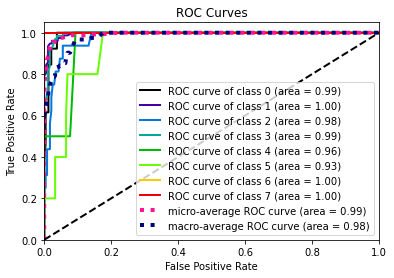

In [141]:
import scikitplot as skplt
probas=rf.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,probas)
plt.show

In [143]:
#saving model
import joblib
joblib.dump(mod,"Globalpower Fuel_Type prediction.pkl")

['Globalpower Fuel_Type prediction.pkl']